# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import seaborn as sns

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [2]:
from scipy.stats import uniform
uniform.rvs(2, 8, size=10)

array([2.37567994, 9.60396345, 5.03883307, 6.81360566, 6.86561169,
       4.1409032 , 9.73504379, 2.6749615 , 7.53027268, 2.73882596])

**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

In [3]:
# uniformly distributed random numbers
import random
def generator(bottom, ceiling, count):
    uniform_randoms = np.random.uniform(bottom, ceiling, count)
    # uniform_randoms = np.array([random.uniform(bottom, ceiling) for i in range(count)])
    
    return uniform_randoms

<Axes: ylabel='Count'>

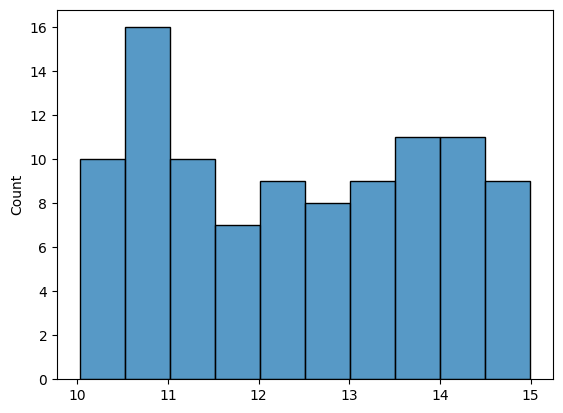

In [4]:
numbers = generator(10,15,100)
sns.histplot(numbers, bins=10)

<Axes: ylabel='Count'>

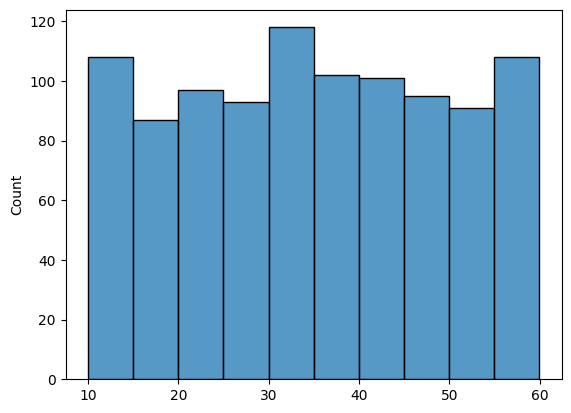

In [5]:
numbers = generator(10,60,1000)
sns.histplot(numbers, bins=10)

How are the two distributions different?

In [6]:
# The distributions are similar. The difference is that with the increase of the vector length
# the count gets more stable/similar with eack other, as a uniform distribution should be.

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

In [7]:
from scipy.stats import norm 

In [8]:
def normal_dist(mean, std, count):
    return norm.rvs(loc = mean, scale = std, size = count)


<Axes: ylabel='Count'>

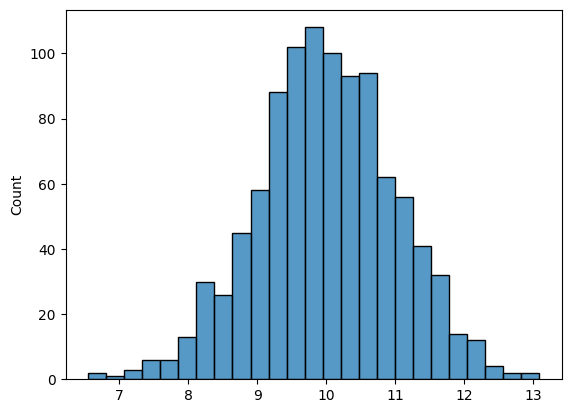

In [9]:
dis_1 = normal_dist(10, 1, 1000)
sns.histplot(dis_1)

<Axes: ylabel='Count'>

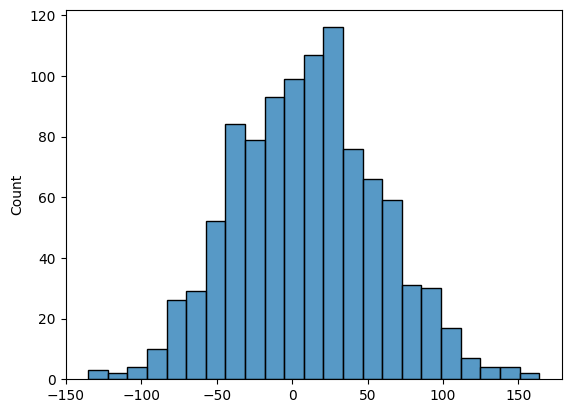

In [10]:
dis_2 = normal_dist(10, 50, 1000)
sns.histplot(dis_2)

How are the two distributions different?

## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

In [11]:
vehicles = pd.read_csv("vehicles.csv")
vehicles.head(3)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100


First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year

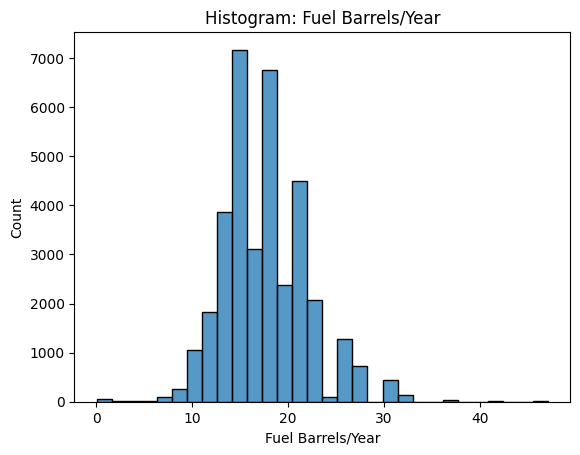

In [12]:

sns.histplot(vehicles, x = 'Fuel Barrels/Year', bins=30)
plt.title("Histogram: Fuel Barrels/Year")
plt.show()


2. CO2 Emission Grams/Mile 

Text(0.5, 1.0, 'Histogram: CO2 Emission Grams/Mile')

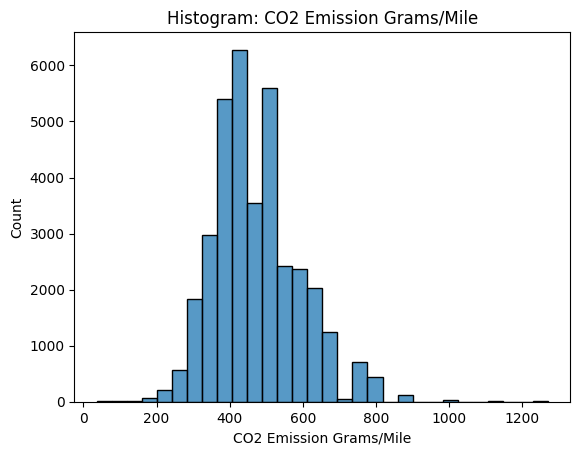

In [13]:
sns.histplot(vehicles, x = 'CO2 Emission Grams/Mile', bins=30)
plt.title("Histogram: CO2 Emission Grams/Mile")


3. Combined MPG

Text(0.5, 1.0, "Histogram: 'Combined MPG'")

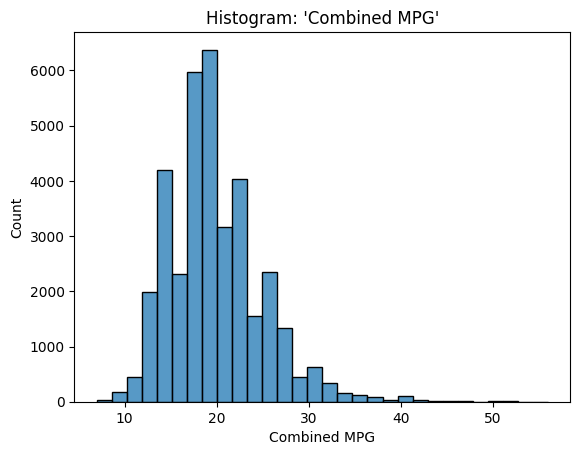

In [14]:
sns.histplot(vehicles, x = 'Combined MPG', bins=30)
plt.title("Histogram: 'Combined MPG'")

Which one(s) of the variables are nearly normally distributed? How do you know?

In [15]:
summary = vehicles[['Fuel Barrels/Year', 'CO2 Emission Grams/Mile', 'Combined MPG']].describe()
summary

,Fuel Barrels/Year,CO2 Emission Grams/Mile,Combined MPG
count,35952.000000,35952.000000,35952.000000
mean,17.609056,475.316339,19.929322
std,4.467283,119.060773,5.112409
min,0.060000,37.000000,7.000000
25%,14.699423,395.000000,16.000000
50%,17.347895,467.736842,19.000000
75%,20.600625,555.437500,23.000000
max,47.087143,1269.571429,56.000000


In [16]:
vehicles[['Fuel Barrels/Year', 'CO2 Emission Grams/Mile', 'Combined MPG']].agg(["skew", "kurtosis"])

,Fuel Barrels/Year,CO2 Emission Grams/Mile,Combined MPG
skew,0.638271,0.741692,1.067773
kurtosis,1.468285,1.263583,2.722551


<Axes: xlabel='Fuel Barrels/Year'>

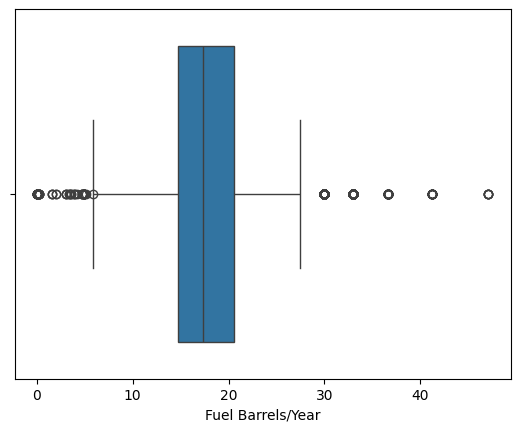

In [17]:
sns.boxplot(vehicles, x = 'Fuel Barrels/Year')

<Axes: xlabel='Combined MPG'>

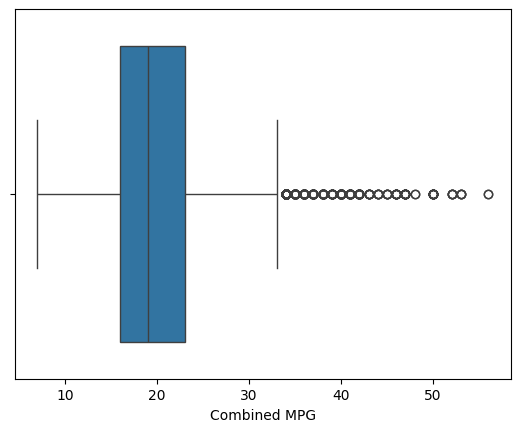

In [18]:
sns.boxplot(vehicles, x = 'Combined MPG')

<Axes: xlabel='CO2 Emission Grams/Mile'>

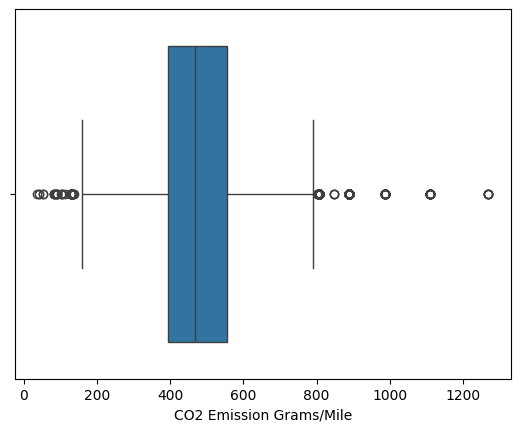

In [19]:
sns.boxplot(vehicles, x = 'CO2 Emission Grams/Mile')


By looking at the boxplots, they might seem almost normal, but according to the skewness and kutosis, the distributions are not normal, considering a threshold skewness and kurtosis of absolute 0.5.

None of them are normally ditributed. 

## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with the size of 10 and 100.

1. Plot the distributions as histograms with the nubmer of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

In [20]:
exp_dist = lambda x, size: np.random.exponential(x, size)

dist_1 = exp_dist(10, 10)
dist_2 = exp_dist(10, 100)

<Axes: ylabel='Count'>

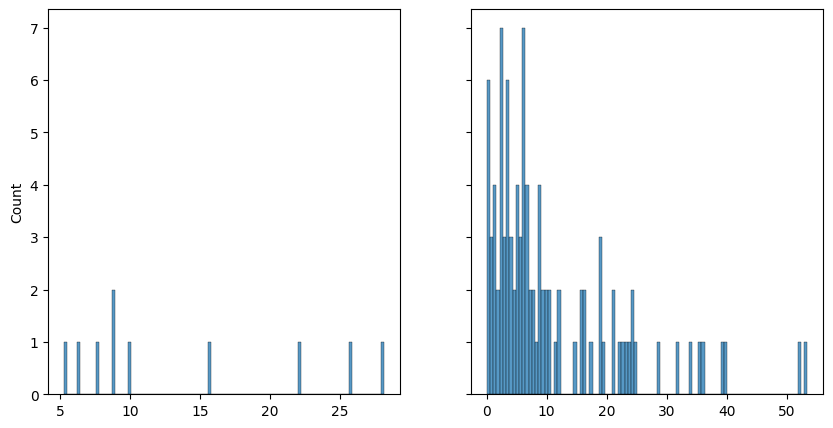

In [21]:
figs, axs = plt.subplots(1,2, figsize=(10, 5), sharey=True)
sns.histplot(dist_1, bins=100, ax=axs[0])
sns.histplot(dist_2, bins=100, ax=axs[1])


How are the two distributions different?

The distribution with less samples doesn't have enough data to fully show the exponential distribution, while the sample 100 can. 

## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

In [22]:
from scipy import stats

mean = 10
scale = 1/mean

p_less_15 = stats.expon.cdf(x = 15, scale=mean)
round(p_less_15,3)

np.float64(0.777)

What is the probability that the customer will spend more than 15 minutes

In [23]:
round(1-p_less_15,3)

np.float64(0.223)